# Gene Function Prediction through DNA Sequence Analysis using Deep Learning 

In this project, I aim to learn how to predict protein-coding genes based on their nucleotide sequences. This project serves as an educational endeavor, however has the potential to be applied in various scientific and practical domains, from basic genomics research to biomedical applications and beyond.

**The main objective** of this project is to develop a machine learning model for the purpose of identifying protein-coding sequences based solely on their DNA nucleotide sequences. A binary classification method will be applied to achieve this goal.

**Data Description:**
For this project, I utilized raw data from the GENCODE release 44 project (17.07.23), which compiles information about the human genome. I obtained two files: Comprehensive gene annotation of the human genome and Transcript sequences, which contain nucleotide sequences of all transcripts on the reference chromosomes.

**Project Plan**:

- Process the available files, merge them into a single dataframe, and define features and labels for analysis.
- Encode the letter sequences appropriately for training machine learning models.
- Create several models, including a neural network, assess their performance, and outline plans for improving the deep learning model.

In [1]:
# Downloading all the necessary libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install biopython
!pip install scikit-learn
!pip install torch

     ---------------------------------------- 10.6/10.6 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 2.4 MB/s eta 0:00:00
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: C:\Users\rirke\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: C:\Users\rirke\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



     ---------------------------------------- 7.6/7.6 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 187.6/187.6 kB 5.7 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.1/2.1 MB 4.4 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl (56 kB)
     ---------------------------------------- 2.6/2.6 MB 1.6 MB/s eta 0:00:00
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: C:\Users\rirke\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


  Using cached biopython-1.81-cp311-cp311-win_amd64.whl (2.7 MB)



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: C:\Users\rirke\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


     ---------------------------------------- 9.2/9.2 MB 2.9 MB/s eta 0:00:00
  Using cached scipy-1.11.3-cp311-cp311-win_amd64.whl (44.1 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: C:\Users\rirke\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


  Using cached torch-2.1.0-cp311-cp311-win_amd64.whl (192.3 MB)
  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
     ---------------------------------------- 1.6/1.6 MB 5.0 MB/s eta 0:00:00
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached fsspec-2023.10.0-py3-none-any.whl (166 kB)
  Using cached MarkupSafe-2.1.3-cp311-cp311-win_amd64.whl (17 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: C:\Users\rirke\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import gzip
import re

from Bio import SeqIO

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.utils.class_weight import compute_class_weight

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

ModuleNotFoundError: No module named 'pandas'

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Unpacking files

In [ ]:
# Paths to gz files
annotations_gtf_file = "gencode.v44.annotation.gtf.gz"
transcripts_fasta_file = "gencode.v44.transcripts.fa.gz"


In [ ]:
# Unpacking a GTF file with annotations to genes

with gzip.open(annotations_gtf_file, 'rt') as annotations_file:
    gencode_annotations = pd.read_csv(annotations_file, sep="\t", comment="#", header=None)
    gencode_annotations.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]

In [ ]:
gencode_annotations

,seqname,source,feature,start,end,score,strand,frame,attribute
0,chr1,HAVANA,gene,11869,14409,.,+,.,"gene_id ""ENSG00000290825.1""; gene_type ""lncRNA""; gene_name ""DDX11L2""; level 2; tag ""overlaps_pseudogene"";"
1,chr1,HAVANA,transcript,11869,14409,.,+,.,"gene_id ""ENSG00000290825.1""; transcript_id ""ENST00000456328.2""; gene_type ""lncRNA""; gene_name ""DDX11L2""; transcript_type ""lncRNA""; transcript_name ""DDX11L2-202""; level 2; transcript_support_level ""1""; tag ""basic""; tag ""Ensembl_canonical""; havana_transcript ""OTTHUMT00000362751.1"";"
2,chr1,HAVANA,exon,11869,12227,.,+,.,"gene_id ""ENSG00000290825.1""; transcript_id ""ENST00000456328.2""; gene_type ""lncRNA""; gene_name ""DDX11L2""; transcript_type ""lncRNA""; transcript_name ""DDX11L2-202""; exon_number 1; exon_id ""ENSE00002234944.1""; level 2; transcript_support_level ""1""; tag ""basic""; tag ""Ensembl_canonical""; havana_transcript ""OTTHUMT00000362751.1"";"
3,chr1,HAVANA,exon,12613,12721,.,+,.,"gene_id ""ENSG00000290825.1""; transcript_id ""ENST00000456328.2""; gene_type ""lncRNA""; gene_name ""DDX11L2""; transcript_type ""lncRNA""; transcript_name ""DDX11L2-202""; exon_number 2; exon_id ""ENSE00003582793.1""; level 2; transcript_support_level ""1""; tag ""basic""; tag ""Ensembl_canonical""; havana_transcript ""OTTHUMT00000362751.1"";"
4,chr1,HAVANA,exon,13221,14409,.,+,.,"gene_id ""ENSG00000290825.1""; transcript_id ""ENST00000456328.2""; gene_type ""lncRNA""; gene_name ""DDX11L2""; transcript_type ""lncRNA""; transcript_name ""DDX11L2-202""; exon_number 3; exon_id ""ENSE00002312635.1""; level 2; transcript_support_level ""1""; tag ""basic""; tag ""Ensembl_canonical""; havana_transcript ""OTTHUMT00000362751.1"";"
...,...,...,...,...,...,...,...,...,...
3424184,chrM,ENSEMBL,transcript,15888,15953,.,+,.,"gene_id ""ENSG00000210195.2""; transcript_id ""ENST00000387460.2""; gene_type ""Mt_tRNA""; gene_name ""MT-TT""; transcript_type ""Mt_tRNA""; transcript_name ""MT-TT-201""; level 3; transcript_support_level ""NA""; hgnc_id ""HGNC:7499""; tag ""basic""; tag ""Ensembl_canonical"";"
3424185,chrM,ENSEMBL,exon,15888,15953,.,+,.,"gene_id ""ENSG00000210195.2""; transcript_id ""ENST00000387460.2""; gene_type ""Mt_tRNA""; gene_name ""MT-TT""; transcript_type ""Mt_tRNA""; transcript_name ""MT-TT-201""; exon_number 1; exon_id ""ENSE00001544475.2""; level 3; transcript_support_level ""NA""; hgnc_id ""HGNC:7499""; tag ""basic""; tag ""Ensembl_canonical"";"
3424186,chrM,ENSEMBL,gene,15956,16023,.,-,.,"gene_id ""ENSG00000210196.2""; gene_type ""Mt_tRNA""; gene_name ""MT-TP""; level 3; hgnc_id ""HGNC:7494"";"
3424187,chrM,ENSEMBL,transcript,15956,16023,.,-,.,"gene_id ""ENSG00000210196.2""; transcript_id ""ENST00000387461.2""; gene_type ""Mt_tRNA""; gene_name ""MT-TP""; transcript_type ""Mt_tRNA""; transcript_name ""MT-TP-201""; level 3; transcript_support_level ""NA""; hgnc_id ""HGNC:7494""; tag ""basic""; tag ""Ensembl_canonical"";"


In [ ]:
# Unpacking FASTA file with nucleotide sequences
with gzip.open(transcripts_fasta_file, 'rt') as sequences_file:
    gencode_sequences = []
    for record in SeqIO.parse(sequences_file, "fasta"):
        gencode_sequences.append([record.id, str(record.seq)])
# Turning it into a pandas dataframe
gencode_sequences = pd.DataFrame(gencode_sequences, columns=['id', 'sequence'])

In [7]:
gencode_sequences

,id,sequence
0,ENST00000456328.2|ENSG00000290825.1|-|OTTHUMT00000362751.1|DDX11L2-202|DDX11L2|1657|lncRNA|,GTTAACTTGCCGTCAGCCTTTTCTTTGACCTCTTCTTTCTGTTCATGTGTATTTGCTGTCTCTTAGCCCAGACTTCCCGTGTCCTTTCCACCGGGCCTTTGAGAGGTCACAGGGTCTTGATGCTGTGGTCTTCATCTGCAGGTGTCTGACTTCCAGCAACTGCTGGCCTGTGCCAGGGTGCAAGCTGAGCACTGGAGTGGAGTTTTCCTGTGGAGAGGAGCCATGCCTAGAGTGGGATGGGCCATTGTTCATCTTCTGGCCCCTGTTGTCTGCATGTAACTTAATACCACAACCAGGCATAGGGGAAAGATTGGAGGAAAGATGAGTGAGAGCATCAACTTCTCTCACAACCTAGGCCAGTGTGTGGTGATGCCAGGCATGCCCTTCCCCAGCATCAGGTCTCCAGAGCTGCAGAAGACGACGGCCGACTTGGATCACACTCTTGTGAGTGTCCCCAGTGTTGCAGAGGCAGGGCCATCAGGCACCAAAGGGATTCTGCCAGCATAGTGCTCCTGGACCAGTGATACACCCGGCACCCTGTCCTGGACACGCTGTTGGCCTGGATCTGAGCCCTGGTGGAGGTCAAAGCCACCTTTGGTTCTGCCATTGCTGCTGTGTGGAAGTTCACTCCTGCCTTTTCCTTTCCCTAGAGCCTCCACCACCCCGAGATCACATTTCTCACTGCCTTTTGTCTGCCCAGTTTCACCAGAAGTAGGCCTCTTCCTGACAGGCAGCTGCACCACTGCCTGGCGCTGTGCCCTTCCTTTGCTCTGCCCGCTGGAGACGGTGTTTGTCATGGGCCTGGTCTGCAGGGATCCTGCTACAAAGGTGAAACCCAGGAGAGTGTGGAGTCCAGAGTGTTGCCAGGACCCAGGCACAGGCATTAGTGCCCGTTGGAGAAAACAGGGGAATCCCGAAGAAATGGTGGGTCCTGGCCATCCGTGAGATCTTCCCAGGGCAGCTCCCCTCTGTGGAATCCAATCTGTCTTCCATCCTGCGTGGCCGAGGGCCAGGCTTCTCACTGGGCCTCTGCAGGAGGCTGCCATTTGTCCTGCCCACCTTCTTAGAAGCGAGACGGAGCAGACCCATCTGCTACTGCCCTTTCTATAATAACTAAAGTTAGCTGCCCTGGACTATTCACCCCCTAGTCTCAATTTAAGAAGATCCCCATGGCCACAGGGCCCCTGCCTGGGGGCTTGTCACCTCCCCCACCTTCTTCCTGAGTCATTCCTGCAGCCTTGCTCCCTAACCTGCCCCACAGCCTTGCCTGGATTTCTATCTCCCTGGCTTGGTGCCAGTTCCTCCAAGTCGATGGCACCTCCCTCCCTCTCAACCACTTGAGCAAACTCCAAGACATCTTCTACCCCAACACCAGCAATTGTGCCAAGGGCCATTAGGCTCTCAGCATGACTATTTTTAGAGACCCCGTGTCTGTCACTGAAACCTTTTTTGTGGGAGACTATTCCTCCCATCTGCAACAGCTGCCCCTGCTGACTGCCCTTCTCTCCTCCCTCTCATCCCAGAGAAACAGGTCAGCTGGGAGCTTCTGCCCCCACTGCCTAGGGACCAACAGGGGCAGGAGGCAGTCACTGACCCCGAGACGTTTGCATCCTGCACAGCTAGAGATCCTTTATTAAAAGCACACTGTTGGTTTCTG
1,ENST00000450305.2|ENSG00000223972.6|OTTHUMG00000000961.2|OTTHUMT00000002844.2|DDX11L1-201|DDX11L1|632|transcribed_unprocessed_pseudogene|,GTGTCTGACTTCCAGCAACTGCTGGCCTGTGCCAGGGTGCAAGCTGAGTTGGAGGAAAGATGAGTGAGAGCATCAACTTCTCTCACAACCTAGGCCAGTGTGTGGTGATGCCAGGCATGCCCTTCCCCAGCATCAGGTCTCCAGAGCTGCAGAAGACGACGGCCGACTTGGATCACACTCTTCTCAGAGCCCAGGCCAGGGGCCCCCAAGAAAGGCTCTGGTGGAGAACCTGTGCATGAAGGCTGTCAACCAGTCCATAGGCAGGGCCATCAGGCACCAAAGGGATTCTGCCAGCATAGTGCTCCTGGACCAGTGATACACCCGGCACCCTGTCCTGGACACGCTGTTGGCCTGGATCTGAGCCCTGGTGGAGGTCAAAGCCACCTTTGGTTCTGCCATTGCTGCTGTGTGGAATTTCACCAGAAGTAGGCCTCTTCCTGACAGGCAGCTGCACCACTGCCTGGCGCTGTGCCCTTCCTTTGCTCTGCCCGCTGGAGACGGTGTTTGTCATGGGCCTGGTCTGCAGGGATCCTGCTACAAAGGTGAAACCCAGGAGAGTGTGGAGTCCAGAGTGTTGCCAGGACCCAGGCACAGGCATTAGTGCCCGTTGGAGAAAACAGGGGAATCCCGAA
2,ENST00000488147.1|ENSG00000227232.5|OTTHUMG00000000958.1|OTTHUMT00000002839.1|WASH7P-201|WASH7P|1351|unprocessed_pseudogene|,ATGGGAGCCGTGTGCACGTCGGGAGCTCGGAGTGAGCGCACCATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATGCCGTGCCCTTCATCCAGCCAGACCTGCGGCGAGAGGAGGCCGTCCAGCAGATGGCGGATGCCCTGCAGTACCTGCAGAAGGTCTCTGGAGACATCTTCAGCAGGTAGAGCAGAGCCGGAGCCAGGTGCAGGCCATTGGAGAGAAGGTCTCCTTGGCCCAGGCCAAGATTGAGAAGATCAAGGGCAGCAAGAAGGCCATCAAGGTGTTCTCCAGTGCCAAGTACCCTGCTCCAGGGCGCCTGCAGGAATATGGCTCCATCTTCACGGGCGCCCAGGACCCTGGCCTGCAGAGACGCCCCCGCCACAGGATCCAGAGCAAGCACCGCCCCCTGGACGAGCGGGCCCTGCAGGAGAAGCTGAAGGACTTTCCTGTGTGCGTGAGCACCAAGCCGGAGCCCGAGGACGATGCAGAAGAGGGACTTGGGGGTCTTCCCAGCAACATCAGCTCTGTCAGCTCCTTGCTGCTCTTCAACACCACCGAGAACCTGTAGAAGAAGTATGTCTTCCTGGACCCCCTGGCTGGTGCTGTAACAAAGACCCATGTGATGCTGGGGGCAGAGACAGAGGAGAAGCTGTTTGATGCCCCCTTGTCCATCAGCAAGAGAGAGCAGCTGGAACAGCAGGTCCCAGAGAACTACTTCTATGTGCCAGACCTGGGCCAGGTGCCTGAGATTGATGTTCCATCCTACCTGCCTGACCTGCCCGGCATTGCCAACGACCTCATGTACATTGCCGACCTGGGCCCCGGCATTGCCCCCTCTGCCCCTGGCACCATTCCAGAACTGCCCACCTTCCACACTGAGGTAGCCGAGCCTCTCAAGACCTACAAGATGGGGTACTAACACCACCCCCACCGCCCCCACCACCACCCCCAGCTCCTGAGGTGCTGGCCAGTGCACCCCCACTCCCACCCTCAACCGCGGCCCCTGTAGGCCAAGGCGCCAGGCAGGACGACAGCAGCAGCAGCGCGTCTCCTTCAGTCCAGGGAGCTCCCAGGGAAGTGGTTGACCCCTCCGGTGGCTGGCCACTCTGCTAGAGTCCATCCGCCAAGCTGGGGGCATCGGCAAGGCCAAGCTGCGCAGCATGAAGGAGCGAAAGCTGGAGAAGCAGCAGCAGAAGGAGCAGGAGCAAGTGAGAGCCACGAGCCAAGGTGGGCACTTGATGTCGCTCCATGGGGGGACGGCTCCACCCAGCCTGCGCCACTGTGTTCTTAAGAGGCTTCCAGAGAAAACGGCACACCAATCAATA

## Data preprocessing

**Data preprocessing plan:**
- extract all the values from the annotations attribute value  
- extract all the values from the sequences id value 
- merge files into a single dataframe  
- add a column to label protein-coding genes
- reduce the number of rows, as it is too big for analisys
- leave only the necessary columns

### Processing dataframe with annotations

In [8]:
# Leaving only transcript annotations, since I will use only transcript sequences to train model

gencode_annotations = gencode_annotations[gencode_annotations['feature'] == 'transcript']

In [9]:
# Function to extract values ​​from genecode_annotations' attribute

def extract_attribute(attribute, key):
    pattern = f'{key} "(.*?)"'
    match = re.search(pattern, attribute)
    if match:
        value = match.group(1)
        attribute = re.sub(pattern, '', attribute)
        return value.strip(), attribute.strip('; ')
    else:
        return None, attribute.strip('; ')

# Creating new columns and retrieving values from attribute

keys_to_extract = ['gene_id', 'gene_type', 'gene_name', 'tag', 'transcript_id', 'transcript_type', 'transcript_name',
                    'transcript_support_level', 'hgnc_id', 'ont', 'havana_transcript', 'protein_id', 'havana_gene', 'ccdsid', 'artif_dupl']

for key in keys_to_extract:
    extracted_values = gencode_annotations['attribute'].apply(lambda x: extract_attribute(x, key))
    gencode_annotations[key] = [val[0] if val[0] else None for val in extracted_values]
    gencode_annotations['attribute'] = [val[1] for val in extracted_values]

gencode_annotations = gencode_annotations.rename(columns={'attribute': 'level'})

gencode_annotations.head()

C:\Users\rirke\AppData\Local\Temp\ipykernel_16276\3365197403.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gencode_annotations[key] = [val[0] if val[0] else None for val in extracted_values]
C:\Users\rirke\AppData\Local\Temp\ipykernel_16276\3365197403.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gencode_annotations['attribute'] = [val[1] for val in extracted_values]
C:\Users\rirke\AppData\Local\Temp\ipykernel_16276\3365197403.py:20: SettingWithCopyWarning: 
A value is trying to be set on a co

,seqname,source,feature,start,end,score,strand,frame,level,gene_id,gene_type,gene_name,tag,transcript_id,transcript_type,transcript_name,transcript_support_level,hgnc_id,ont,havana_transcript,protein_id,havana_gene,ccdsid,artif_dupl
1,chr1,HAVANA,transcript,11869,14409,.,+,.,level 2,ENSG00000290825.1,lncRNA,DDX11L2,basic,ENST00000456328.2,lncRNA,DDX11L2-202,1,None,None,OTTHUMT00000362751.1,None,None,None,None
6,chr1,HAVANA,transcript,12010,13670,.,+,.,level 2,ENSG00000223972.6,transcribed_unprocessed_pseudogene,DDX11L1,basic,ENST00000450305.2,transcribed_unprocessed_pseudogene,DDX11L1-201,NA,HGNC:37102,PGO:0000005,OTTHUMT00000002844.2,None,OTTHUMG00000000961.2,None,None
14,chr1,HAVANA,transcript,14404,29570,.,-,.,level 2,ENSG00000227232.5,unprocessed_pseudogene,WASH7P,basic,ENST00000488147.1,unprocessed_pseudogene,WASH7P-201,NA,HGNC:38034,PGO:0000005,OTTHUMT00000002839.1,None,OTTHUMG00000000958.1,None,None
27,chr1,ENSEMBL,transcript,17369,17436,.,-,.,level 3,ENSG00000278267.1,miRNA,MIR6859-1,basic,ENST00000619216.1,miRNA,MIR6859-1-201,NA,HGNC:50039,None,None,None,None,None,None
30,chr1,HAVANA,transcript,29554,31097,.,+,.,level 2,ENSG00000243485.5,lncRNA,MIR1302-2HG,not_best_in_genome_evidence,ENST00000473358.1,lncRNA,MIR1302-2HG-202,5,HGNC:52482,None,OTTHUMT00000002840.1,None,OTTHUMG00000000959.2,None,None


### Processing dataframe with sequences

In [10]:
# Splitting the id column

gencode_sequences['id'] = gencode_sequences['id'].str.rstrip('|')

gencode_sequences[['transcript_id', 'gene_id', 'havana_gene', 'havana_transcript', 'transcript_name', 'gene_name', 'sequence_length', 'transcript_type']] = gencode_sequences['id'].str.split('|', expand=True)

gencode_sequences.drop(columns=['id'], inplace=True)

# Moving the column with sequences to the end of the dataframe

sequences = gencode_sequences['sequence']
gencode_sequences.drop(columns=['sequence'], inplace=True)
gencode_sequences['sequence'] = sequences

gencode_sequences.head()

,transcript_id,gene_id,havana_gene,havana_transcript,transcript_name,gene_name,sequence_length,transcript_type,sequence
0,ENST00000456328.2,ENSG00000290825.1,-,OTTHUMT00000362751.1,DDX11L2-202,DDX11L2,1657,lncRNA,GTTAACTTGCCGTCAGCCTTTTCTTTGACCTCTTCTTTCTGTTCATGTGTATTTGCTGTCTCTTAGCCCAGACTTCCCGTGTCCTTTCCACCGGGCCTTTGAGAGGTCACAGGGTCTTGATGCTGTGGTCTTCATCTGCAGGTGTCTGACTTCCAGCAACTGCTGGCCTGTGCCAGGGTGCAAGCTGAGCACTGGAGTGGAGTTTTCCTGTGGAGAGGAGCCATGCCTAGAGTGGGATGGGCCATTGTTCATCTTCTGGCCCCTGTTGTCTGCATGTAACTTAATACCACAACCAGGCATAGGGGAAAGATTGGAGGAAAGATGAGTGAGAGCATCAACTTCTCTCACAACCTAGGCCAGTGTGTGGTGATGCCAGGCATGCCCTTCCCCAGCATCAGGTCTCCAGAGCTGCAGAAGACGACGGCCGACTTGGATCACACTCTTGTGAGTGTCCCCAGTGTTGCAGAGGCAGGGCCATCAGGCACCAAAGGGATTCTGCCAGCATAGTGCTCCTGGACCAGTGATACACCCGGCACCCTGTCCTGGACACGCTGTTGGCCTGGATCTGAGCCCTGGTGGAGGTCAAAGCCACCTTTGGTTCTGCCATTGCTGCTGTGTGGAAGTTCACTCCTGCCTTTTCCTTTCCCTAGAGCCTCCACCACCCCGAGATCACATTTCTCACTGCCTTTTGTCTGCCCAGTTTCACCAGAAGTAGGCCTCTTCCTGACAGGCAGCTGCACCACTGCCTGGCGCTGTGCCCTTCCTTTGCTCTGCCCGCTGGAGACGGTGTTTGTCATGGGCCTGGTCTGCAGGGATCCTGCTACAAAGGTGAAACCCAGGAGAGTGTGGAGTCCAGAGTGTTGCCAGGACCCAGGCACAGGCATTAGTGCCCGTTGGAGAAAACAGGGGAATCCCGAAGAAATGGTGGGTCCTGGCCATCCGTGAGATCTTCCCAGGGCAGCTCCCCTCTGTGGAATCCAATCTGTCTTCCATCCTGCGTGGCCGAGGGCCAGGCTTCTCACTGGGCCTCTGCAGGAGGCTGCCATTTGTCCTGCCCACCTTCTTAGAAGCGAGACGGAGCAGACCCATCTGCTACTGCCCTTTCTATAATAACTAAAGTTAGCTGCCCTGGACTATTCACCCCCTAGTCTCAATTTAAGAAGATCCCCATGGCCACAGGGCCCCTGCCTGGGGGCTTGTCACCTCCCCCACCTTCTTCCTGAGTCATTCCTGCAGCCTTGCTCCCTAACCTGCCCCACAGCCTTGCCTGGATTTCTATCTCCCTGGCTTGGTGCCAGTTCCTCCAAGTCGATGGCACCTCCCTCCCTCTCAACCACTTGAGCAAACTCCAAGACATCTTCTACCCCAACACCAGCAATTGTGCCAAGGGCCATTAGGCTCTCAGCATGACTATTTTTAGAGACCCCGTGTCTGTCACTGAAACCTTTTTTGTGGGAGACTATTCCTCCCATCTGCAACAGCTGCCCCTGCTGACTGCCCTTCTCTCCTCCCTCTCATCCCAGAGAAACAGGTCAGCTGGGAGCTTCTGCCCCCACTGCCTAGGGACCAACAGGGGCAGGAGGCAGTCACTGACCCCGAGACGTTTGCATCCTGCACAGCTAGAGATCCTTTATTAAAAGCACACTGTTGGTTTCTG
1,ENST00000450305.2,ENSG00000223972.6,OTTHUMG00000000961.2,OTTHUMT00000002844.2,DDX11L1-201,DDX11L1,632,transcribed_unprocessed_pseudogene,GTGTCTGACTTCCAGCAACTGCTGGCCTGTGCCAGGGTGCAAGCTGAGTTGGAGGAAAGATGAGTGAGAGCATCAACTTCTCTCACAACCTAGGCCAGTGTGTGGTGATGCCAGGCATGCCCTTCCCCAGCATCAGGTCTCCAGAGCTGCAGAAGACGACGGCCGACTTGGATCACACTCTTCTCAGAGCCCAGGCCAGGGGCCCCCAAGAAAGGCTCTGGTGGAGAACCTGTGCATGAAGGCTGTCAACCAGTCCATAGGCAGGGCCATCAGGCACCAAAGGGATTCTGCCAGCATAGTGCTCCTGGACCAGTGATACACCCGGCACCCTGTCCTGGACACGCTGTTGGCCTGGATCTGAGCCCTGGTGGAGGTCAAAGCCACCTTTGGTTCTGCCATTGCTGCTGTGTGGAATTTCACCAGAAGTAGGCCTCTTCCTGACAGGCAGCTGCACCACTGCCTGGCGCTGTGCCCTTCCTTTGCTCTGCCCGCTGGAGACGGTGTTTGTCATGGGCCTGGTCTGCAGGGATCCTGCTACAAAGGTGAAACCCAGGAGAGTGTGGAGTCCAGAGTGTTGCCAGGACCCAGGCACAGGCATTAGTGCCCGTTGGAGAAAACAGGGGAATCCCGAA
2,ENST00000488147.1,ENSG00000227232.5,OTTHUMG00000000958.1,OTTHUMT00000002839.1,WASH7P-201,WASH7P,1351,unprocessed_pseudogene,ATGGGAGCCGTGTGCACGTCGGGAGCTCGGAGTGAGCGCACCATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATGCCGTGCCCTTCATCCAGCCAGACCTGCGGCGAGAGGAGGCCGTCCAGCAGATGGCGGATGCCCTGCAGTACCTGCAGAAGGTCTCTGGAGACATCTTCAGCAGGTAGAGCAGAGCCGGAGCCAGGTGCAGGCCATTGGAGAGAAGGTCTCCTTGGCCCAGGCCAAGATTGAGAAGATCAAGGGCAGCAAGAAGGCCATCAAGGTGTTCTCCAGTGCCAAGTACCCTGCTCCAGGGCGCCTGCAGGAATATGGCTCCATCTTCACGGGCGCCCAGGACCCTGGCCTGCAGAGACGCCCCCGCCACAGGATCCAGAGCAAGCACCGCCCCCTGGACGAGCGGGCCCTGCAGGAGAAGCTGAAGGACTTTCCTGTGTGCGTGAGCACCAAGCCGGAGCCCGAGGACGATGCAGAAGAGGGACTTGGGGGTCTTCCCAGCAACATCAGCTCTGTCAGCTCCTTGCTGCTCTTCAACACCACCGAGAACCTGTAGAAGAAGTATGTCTTCCTGGACCCCCTGGCTGGTGCTGTAACAAAGACCCATGTGATGCTGGGGGCAGAGACAGAGGAGAAGCTGTTTGATGCCCCCTTGTCCATCAGCAAGAGAGAGCAGCTGGAACAGCAGGTCCCAGAGAACTACTTCTATGTGCCAGACCTGGGCCAGGTGCCTGAGATTGATGTTCCATCCTACCTGCCTGACCTGCCCGGCATTGCCAACGACCTCATGTACATTGCCGACCTGGGCCCCGGCATTGCCCCCTCTGCCCCTGGCACCATTCCAGAACTGCCCACCTTCCACACTGAGGTAGCCGAGCCTCTCAAGACCTACAAGATGGGGTACTAACACCACCCCCACCGCCCCCACCACCACCCCCAGCTCCTGAGGTGCTGGCCAGTGCACCCCCACTCCCACCCTCAACCGCGGCCCCTGTAGGCCAAGGCGCCAGGCAGGACGACAGCAGCAGCAGCGCGTCTCCTTCAGTCCAGGGAGCTCCCAGGGAAGTGGTTGACCCCTCCGGTGGCTGGCCACTCTGCTAGAGTCCATCCGCCAAGCTGGGGGCATCGGCAAGGCCAAGCTGCGCAGCATGAAGGAGCGAAAGCTGGAGAAGCAGCAGCAGAAGGAGCAGGAGCAAGTGAGAGCCACGA

### Creating a merged dataframe

In [11]:
# Combining the data into one large dataframe, leaving only the columns that may be needed in the analysis

gencode_annotations_selected = gencode_annotations[['transcript_id', 'transcript_name', 'gene_type', 'gene_id', 'gene_name', 'seqname']]
gencode_sequences_selected = gencode_sequences[['transcript_id', 'sequence_length', 'sequence']]


merged_df = pd.merge(gencode_annotations_selected, gencode_sequences_selected, on='transcript_id', how='inner')
merged_df

,transcript_id,transcript_name,gene_type,gene_id,gene_name,seqname,sequence_length,sequence
0,ENST00000456328.2,DDX11L2-202,lncRNA,ENSG00000290825.1,DDX11L2,chr1,1657,GTTAACTTGCCGTCAGCCTTTTCTTTGACCTCTTCTTTCTGTTCATGTGTATTTGCTGTCTCTTAGCCCAGACTTCCCGTGTCCTTTCCACCGGGCCTTTGAGAGGTCACAGGGTCTTGATGCTGTGGTCTTCATCTGCAGGTGTCTGACTTCCAGCAACTGCTGGCCTGTGCCAGGGTGCAAGCTGAGCACTGGAGTGGAGTTTTCCTGTGGAGAGGAGCCATGCCTAGAGTGGGATGGGCCATTGTTCATCTTCTGGCCCCTGTTGTCTGCATGTAACTTAATACCACAACCAGGCATAGGGGAAAGATTGGAGGAAAGATGAGTGAGAGCATCAACTTCTCTCACAACCTAGGCCAGTGTGTGGTGATGCCAGGCATGCCCTTCCCCAGCATCAGGTCTCCAGAGCTGCAGAAGACGACGGCCGACTTGGATCACACTCTTGTGAGTGTCCCCAGTGTTGCAGAGGCAGGGCCATCAGGCACCAAAGGGATTCTGCCAGCATAGTGCTCCTGGACCAGTGATACACCCGGCACCCTGTCCTGGACACGCTGTTGGCCTGGATCTGAGCCCTGGTGGAGGTCAAAGCCACCTTTGGTTCTGCCATTGCTGCTGTGTGGAAGTTCACTCCTGCCTTTTCCTTTCCCTAGAGCCTCCACCACCCCGAGATCACATTTCTCACTGCCTTTTGTCTGCCCAGTTTCACCAGAAGTAGGCCTCTTCCTGACAGGCAGCTGCACCACTGCCTGGCGCTGTGCCCTTCCTTTGCTCTGCCCGCTGGAGACGGTGTTTGTCATGGGCCTGGTCTGCAGGGATCCTGCTACAAAGGTGAAACCCAGGAGAGTGTGGAGTCCAGAGTGTTGCCAGGACCCAGGCACAGGCATTAGTGCCCGTTGGAGAAAACAGGGGAATCCCGAAGAAATGGTGGGTCCTGGCCATCCGTGAGATCTTCCCAGGGCAGCTCCCCTCTGTGGAATCCAATCTGTCTTCCATCCTGCGTGGCCGAGGGCCAGGCTTCTCACTGGGCCTCTGCAGGAGGCTGCCATTTGTCCTGCCCACCTTCTTAGAAGCGAGACGGAGCAGACCCATCTGCTACTGCCCTTTCTATAATAACTAAAGTTAGCTGCCCTGGACTATTCACCCCCTAGTCTCAATTTAAGAAGATCCCCATGGCCACAGGGCCCCTGCCTGGGGGCTTGTCACCTCCCCCACCTTCTTCCTGAGTCATTCCTGCAGCCTTGCTCCCTAACCTGCCCCACAGCCTTGCCTGGATTTCTATCTCCCTGGCTTGGTGCCAGTTCCTCCAAGTCGATGGCACCTCCCTCCCTCTCAACCACTTGAGCAAACTCCAAGACATCTTCTACCCCAACACCAGCAATTGTGCCAAGGGCCATTAGGCTCTCAGCATGACTATTTTTAGAGACCCCGTGTCTGTCACTGAAACCTTTTTTGTGGGAGACTATTCCTCCCATCTGCAACAGCTGCCCCTGCTGACTGCCCTTCTCTCCTCCCTCTCATCCCAGAGAAACAGGTCAGCTGGGAGCTTCTGCCCCCACTGCCTAGGGACCAACAGGGGCAGGAGGCAGTCACTGACCCCGAGACGTTTGCATCCTGCACAGCTAGAGATCCTTTATTAAAAGCACACTGTTGGTTTCTG
1,ENST00000450305.2,DDX11L1-201,transcribed_unprocessed_pseudogene,ENSG00000223972.6,DDX11L1,chr1,632,GTGTCTGACTTCCAGCAACTGCTGGCCTGTGCCAGGGTGCAAGCTGAGTTGGAGGAAAGATGAGTGAGAGCATCAACTTCTCTCACAACCTAGGCCAGTGTGTGGTGATGCCAGGCATGCCCTTCCCCAGCATCAGGTCTCCAGAGCTGCAGAAGACGACGGCCGACTTGGATCACACTCTTCTCAGAGCCCAGGCCAGGGGCCCCCAAGAAAGGCTCTGGTGGAGAACCTGTGCATGAAGGCTGTCAACCAGTCCATAGGCAGGGCCATCAGGCACCAAAGGGATTCTGCCAGCATAGTGCTCCTGGACCAGTGATACACCCGGCACCCTGTCCTGGACACGCTGTTGGCCTGGATCTGAGCCCTGGTGGAGGTCAAAGCCACCTTTGGTTCTGCCATTGCTGCTGTGTGGAATTTCACCAGAAGTAGGCCTCTTCCTGACAGGCAGCTGCACCACTGCCTGGCGCTGTGCCCTTCCTTTGCTCTGCCCGCTGGAGACGGTGTTTGTCATGGGCCTGGTCTGCAGGGATCCTGCTACAAAGGTGAAACCCAGGAGAGTGTGGAGTCCAGAGTGTTGCCAGGACCCAGGCACAGGCATTAGTGCCCGTTGGAGAAAACAGGGGAATCCCGAA
2,ENST00000488147.1,WASH7P-201,unprocessed_pseudogene,ENSG00000227232.5,WASH7P,chr1,1351,ATGGGAGCCGTGTGCACGTCGGGAGCTCGGAGTGAGCGCACCATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATGCCGTGCCCTTCATCCAGCCAGACCTGCGGCGAGAGGAGGCCGTCCAGCAGATGGCGGATGCCCTGCAGTACCTGCAGAAGGTCTCTGGAGACATCTTCAGCAGGTAGAGCAGAGCCGGAGCCAGGTGCAGGCCATTGGAGAGAAGGTCTCCTTGGCCCAGGCCAAGATTGAGAAGATCAAGGGCAGCAAGAAGGCCATCAAGGTGTTCTCCAGTGCCAAGTACCCTGCTCCAGGGCGCCTGCAGGAATATGGCTCCATCTTCACGGGCGCCCAGGACCCTGGCCTGCAGAGACGCCCCCGCCACAGGATCCAGAGCAAGCACCGCCCCCTGGACGAGCGGGCCCTGCAGGAGAAGCTGAAGGACTTTCCTGTGTGCGTGAGCACCAAGCCGGAGCCCGAGGACGATGCAGAAGAGGGACTTGGGGGTCTTCCCAGCAACATCAGCTCTGTCAGCTCCTTGCTGCTCTTCAACACCACCGAGAACCTGTAGAAGAAGTATGTCTTCCTGGACCCCCTGGCTGGTGCTGTAACAAAGACCCATGTGATGCTGGGGGCAGAGACAGAGGAGAAGCTGTTTGATGCCCCCTTGTCCATCAGCAAGAGAGAGCAGCTGGAACAGCAGGTCCCAGAGAACTACTTCTATGTGCCAGACCTGGGCCAGGTGCCTGAGATTGATGTTCCATCCTACCTGCCTGACCTGCCCGGCATTGCCAACGACCTCATGTACATTGCCGACCTGGGCCCCGGCATTGCCCCCTCTGCCCCTGGCACCATTCCAGAACTGCCCACCTTCCACACTGAGGTAGCCGAGCCTCTCAAGACCTACAAGATGGGGTACTAACACCACCCCCACCGCCCCCACCACCACCCCCAGCTCCTGAGGTGCTGGCCAGTGCACCCCCACTCCCACCCTCAACCGCGGCCCCTGTAGGCCAAGGCGCCAGGCAGGACGACAGCAGCAGCAGCGCGTCTCCTTCAGTCCAGGGAGCTCCCAGGGAAGTGGTTGACCCCTCCGGTGGCTGGCCACTCTGCTAGAGTCCATCCGCCAAGCTGGGGGCATCGGCAAGGCCAAGCTGCGCAGCATGAAGGAGCGAAAGCTGGAGAAGCAGCAGCAGAAGGAGCAGGAGCAAGTGAGAGCCACGAGCCAAGGTGGGCACTTGATGTCGCTCCATGGGGGGACGGCTCCACCCAGCCTGCGCCACTGTGTTCTTAAGAGGCTTCCAGAGAAAACGGCACACCAATCAATAAAGAACTGAGCAGAAA

In [12]:
# Adding an additional column with information about whether the sequence is protein-coding or not

merged_df['protein_coding'] = merged_df['gene_type'].apply(lambda x: 1 if x == 'protein_coding' else 0)
merged_df.head()

,transcript_id,transcript_name,gene_type,gene_id,gene_name,seqname,sequence_length,sequence,protein_coding
0,ENST00000456328.2,DDX11L2-202,lncRNA,ENSG00000290825.1,DDX11L2,chr1,1657,GTTAACTTGCCGTCAGCCTTTTCTTTGACCTCTTCTTTCTGTTCATGTGTATTTGCTGTCTCTTAGCCCAGACTTCCCGTGTCCTTTCCACCGGGCCTTTGAGAGGTCACAGGGTCTTGATGCTGTGGTCTTCATCTGCAGGTGTCTGACTTCCAGCAACTGCTGGCCTGTGCCAGGGTGCAAGCTGAGCACTGGAGTGGAGTTTTCCTGTGGAGAGGAGCCATGCCTAGAGTGGGATGGGCCATTGTTCATCTTCTGGCCCCTGTTGTCTGCATGTAACTTAATACCACAACCAGGCATAGGGGAAAGATTGGAGGAAAGATGAGTGAGAGCATCAACTTCTCTCACAACCTAGGCCAGTGTGTGGTGATGCCAGGCATGCCCTTCCCCAGCATCAGGTCTCCAGAGCTGCAGAAGACGACGGCCGACTTGGATCACACTCTTGTGAGTGTCCCCAGTGTTGCAGAGGCAGGGCCATCAGGCACCAAAGGGATTCTGCCAGCATAGTGCTCCTGGACCAGTGATACACCCGGCACCCTGTCCTGGACACGCTGTTGGCCTGGATCTGAGCCCTGGTGGAGGTCAAAGCCACCTTTGGTTCTGCCATTGCTGCTGTGTGGAAGTTCACTCCTGCCTTTTCCTTTCCCTAGAGCCTCCACCACCCCGAGATCACATTTCTCACTGCCTTTTGTCTGCCCAGTTTCACCAGAAGTAGGCCTCTTCCTGACAGGCAGCTGCACCACTGCCTGGCGCTGTGCCCTTCCTTTGCTCTGCCCGCTGGAGACGGTGTTTGTCATGGGCCTGGTCTGCAGGGATCCTGCTACAAAGGTGAAACCCAGGAGAGTGTGGAGTCCAGAGTGTTGCCAGGACCCAGGCACAGGCATTAGTGCCCGTTGGAGAAAACAGGGGAATCCCGAAGAAATGGTGGGTCCTGGCCATCCGTGAGATCTTCCCAGGGCAGCTCCCCTCTGTGGAATCCAATCTGTCTTCCATCCTGCGTGGCCGAGGGCCAGGCTTCTCACTGGGCCTCTGCAGGAGGCTGCCATTTGTCCTGCCCACCTTCTTAGAAGCGAGACGGAGCAGACCCATCTGCTACTGCCCTTTCTATAATAACTAAAGTTAGCTGCCCTGGACTATTCACCCCCTAGTCTCAATTTAAGAAGATCCCCATGGCCACAGGGCCCCTGCCTGGGGGCTTGTCACCTCCCCCACCTTCTTCCTGAGTCATTCCTGCAGCCTTGCTCCCTAACCTGCCCCACAGCCTTGCCTGGATTTCTATCTCCCTGGCTTGGTGCCAGTTCCTCCAAGTCGATGGCACCTCCCTCCCTCTCAACCACTTGAGCAAACTCCAAGACATCTTCTACCCCAACACCAGCAATTGTGCCAAGGGCCATTAGGCTCTCAGCATGACTATTTTTAGAGACCCCGTGTCTGTCACTGAAACCTTTTTTGTGGGAGACTATTCCTCCCATCTGCAACAGCTGCCCCTGCTGACTGCCCTTCTCTCCTCCCTCTCATCCCAGAGAAACAGGTCAGCTGGGAGCTTCTGCCCCCACTGCCTAGGGACCAACAGGGGCAGGAGGCAGTCACTGACCCCGAGACGTTTGCATCCTGCACAGCTAGAGATCCTTTATTAAAAGCACACTGTTGGTTTCTG,0
1,ENST00000450305.2,DDX11L1-201,transcribed_unprocessed_pseudogene,ENSG00000223972.6,DDX11L1,chr1,632,GTGTCTGACTTCCAGCAACTGCTGGCCTGTGCCAGGGTGCAAGCTGAGTTGGAGGAAAGATGAGTGAGAGCATCAACTTCTCTCACAACCTAGGCCAGTGTGTGGTGATGCCAGGCATGCCCTTCCCCAGCATCAGGTCTCCAGAGCTGCAGAAGACGACGGCCGACTTGGATCACACTCTTCTCAGAGCCCAGGCCAGGGGCCCCCAAGAAAGGCTCTGGTGGAGAACCTGTGCATGAAGGCTGTCAACCAGTCCATAGGCAGGGCCATCAGGCACCAAAGGGATTCTGCCAGCATAGTGCTCCTGGACCAGTGATACACCCGGCACCCTGTCCTGGACACGCTGTTGGCCTGGATCTGAGCCCTGGTGGAGGTCAAAGCCACCTTTGGTTCTGCCATTGCTGCTGTGTGGAATTTCACCAGAAGTAGGCCTCTTCCTGACAGGCAGCTGCACCACTGCCTGGCGCTGTGCCCTTCCTTTGCTCTGCCCGCTGGAGACGGTGTTTGTCATGGGCCTGGTCTGCAGGGATCCTGCTACAAAGGTGAAACCCAGGAGAGTGTGGAGTCCAGAGTGTTGCCAGGACCCAGGCACAGGCATTAGTGCCCGTTGGAGAAAACAGGGGAATCCCGAA,0
2,ENST00000488147.1,WASH7P-201,unprocessed_pseudogene,ENSG00000227232.5,WASH7P,chr1,1351,ATGGGAGCCGTGTGCACGTCGGGAGCTCGGAGTGAGCGCACCATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATGCCGTGCCCTTCATCCAGCCAGACCTGCGGCGAGAGGAGGCCGTCCAGCAGATGGCGGATGCCCTGCAGTACCTGCAGAAGGTCTCTGGAGACATCTTCAGCAGGTAGAGCAGAGCCGGAGCCAGGTGCAGGCCATTGGAGAGAAGGTCTCCTTGGCCCAGGCCAAGATTGAGAAGATCAAGGGCAGCAAGAAGGCCATCAAGGTGTTCTCCAGTGCCAAGTACCCTGCTCCAGGGCGCCTGCAGGAATATGGCTCCATCTTCACGGGCGCCCAGGACCCTGGCCTGCAGAGACGCCCCCGCCACAGGATCCAGAGCAAGCACCGCCCCCTGGACGAGCGGGCCCTGCAGGAGAAGCTGAAGGACTTTCCTGTGTGCGTGAGCACCAAGCCGGAGCCCGAGGACGATGCAGAAGAGGGACTTGGGGGTCTTCCCAGCAACATCAGCTCTGTCAGCTCCTTGCTGCTCTTCAACACCACCGAGAACCTGTAGAAGAAGTATGTCTTCCTGGACCCCCTGGCTGGTGCTGTAACAAAGACCCATGTGATGCTGGGGGCAGAGACAGAGGAGAAGCTGTTTGATGCCCCCTTGTCCATCAGCAAGAGAGAGCAGCTGGAACAGCAGGTCCCAGAGAACTACTTCTATGTGCCAGACCTGGGCCAGGTGCCTGAGATTGATGTTCCATCCTACCTGCCTGACCTGCCCGGCATTGCCAACGACCTCATGTACATTGCCGACCTGGGCCCCGGCATTGCCCCCTCTGCCCCTGGCACCATTCCAGAACTGCCCACCTTCCACACTGAGGTAGCCGAGCCTCTCAAGACCTACAAGATGGGGTACTAACACCACCCCCACCGCCCCCACCACCACCCCCAGCTCCTGAGGTGCTGGCCAGTGCACCCCCACTCCCACCCTCAACCGCGGCCCCTGTAGGCCAAGGCGCCAGGCAGGACGACAGCAGCAGCAGCGCGTCTCCTTCAGTCCAGGGAGCTCCCAGGGAAGTGGTTGACCCCTCCGGTGGCTGGCCACTCTGCTAGAGTCCATCCGCCAAGCTGGGGGCATCGGCAAGGCCAAGCTGCGCAGCATGAAGGAGCGAAAGCTGGAGAAGCAGCAGCAGAAGGAGCAGGAGCAAGTGAGAGCCACGAGCCAAGGTGGGCACTTGATGTCGCTCCATGGGGGGACGGCTCCACCCAGCCTGCGCCACTGTGTTCTTAAGAGGCTTCCAGAGAAAACGGCACACCAATCA

In [13]:
merged_df.dtypes

transcript_id      object
transcript_name    object
gene_type          object
gene_id            object
gene_name          object
seqname            object
sequence_length    object
sequence           object
protein_coding      int64
dtype: object

In [14]:
# Changing the sequence_length datatype

merged_df['sequence_length'] = merged_df['sequence_length'].astype('float')
merged_df['sequence_length'].dtype

dtype('float64')

### Doing some exploratory analisys to reduce the volume of data

Amount of transcripts: 252835
Amount of represented genes: 61228


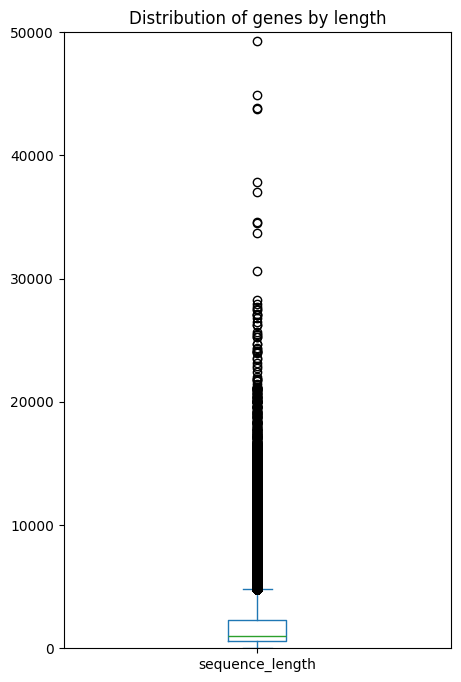

In [15]:
# Looking at the distribution of genes by their length

merged_df['sequence_length'].plot(kind='box',
                                  figsize=(5, 8), 
                                  ylim=(0, 50000), 
                                  title='Distribution of genes by length'
                                );

print('Amount of transcripts:', len(merged_df))
print('Amount of represented genes:', len(merged_df['gene_name'].unique()))

In [16]:
# Deleting all the rows with sequences with less that 20000 lettes, for easier encoding
merged_df = merged_df.astype({'sequence_length': 'int32'})
merged_df = merged_df[merged_df['sequence_length'] <= 20000]

print('Amount of transcripts:', len(merged_df))
print('Amount of represented genes:', len(merged_df['gene_name'].unique()))

Amount of transcripts: 252743
Amount of represented genes: 61222


I am loosing the representation of 6 humain genes from my initial database, however otherwise the volume of the data would be too big to train my models

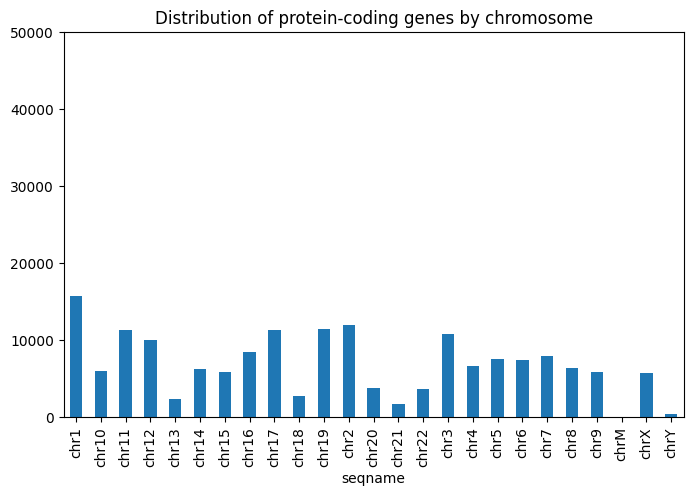

In [17]:
# Looking at the distribution of protein-coding genes by their chromosome

merged_df[merged_df['protein_coding'] == 1].groupby(['seqname'])['transcript_id'].count().plot(kind='bar',
                                  figsize=(8, 5), 
                                  ylim=(0, 50000), 
                                  title='Distribution of protein-coding genes by chromosome'
                                );

The chromosome which the gene was extracted from can also be a valuable feature for detecting whether it is protein-coding of not. I won't use it in my project, as my objective is to detect it solely by nucleotide sequece

## Data encoding

I have implemented various encoding techniques - one-hot encoding, ordinal encoding and some others,  
the **k-meres method** has appeared to be the most suitable for my task as it creates vectors of uniform length, which is important for me as I can't truncate the sequences as it will lead to the loss of information, as well as pad them as it requires too much memory. 


In [18]:
# Encoding letter sequences using the k-mers method

sequences = merged_df['sequence']

def Kmers_funct(seq, size):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

kmer_size = 6

kmer_generators = (Kmers_funct(seq, size=kmer_size) for seq in sequences)

sentences = []

for kmer_generator in kmer_generators:
    kmer_list = list(kmer_generator)  
    sentence = ' '.join(kmer_list)  
    sentences.append(sentence)  

In [19]:
# Defining the features and target label

cv = CountVectorizer()
features = cv.fit_transform(sentences).toarray()
target = merged_df['protein_coding']

In [20]:
# Splitting the data into three samples

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)


## Evaluation of the class balance

In [23]:
class_count = merged_df['protein_coding'].value_counts()
class_count

protein_coding
1    170307
0     82436
Name: count, dtype: int64

In [25]:
class_count[1] / len(merged_df)

0.673834685827105

Almost 70% of the sequences in my dataset are protein-coding, I will eliminate class imbalance in some of the future models.

## Machine Learning Models creation

In [29]:
# Creating a Random Forest classification model

rf_model = RandomForestClassifier(n_estimators=100, random_state=12345)

rf_model.fit(features_train, target_train)

target_pred = rf_model.predict(features_valid)

accuracy = accuracy_score(target_valid, target_pred)
precision = precision_score(target_valid, target_pred)
recall = recall_score(target_valid, target_pred)
f1 = f1_score(target_valid, target_pred)
confusion = confusion_matrix(target_valid, target_pred)

print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')
print('confusion_matrix:')
print(confusion)

accuracy: 0.8335674296227423
precision: 0.8229849009838387
recall: 0.9583554220415856
f1: 0.8855265127291033
confusion_matrix:
[[ 9596  6999]
 [ 1414 32540]]


In [30]:
# Creating a Random Forest classification model with balanced classes

rf_model = RandomForestClassifier(n_estimators=100, random_state=12345, class_weight='balanced')

rf_model.fit(features_train, target_train)

target_pred = rf_model.predict(features_valid)

accuracy = accuracy_score(target_valid, target_pred)
precision = precision_score(target_valid, target_pred)
recall = recall_score(target_valid, target_pred)
f1 = f1_score(target_valid, target_pred)
confusion = confusion_matrix(target_valid, target_pred)

print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')
print('confusion_matrix:')
print(confusion)

accuracy: 0.8260301885299413
precision: 0.820232155584971
recall: 0.948989809742593
f1: 0.8799257216199241
confusion_matrix:
[[ 9533  7062]
 [ 1732 32222]]


In [34]:
# Creating a Naive Bayes classification model

nb_model = MultinomialNB()


nb_model.fit(features_train, target_train)


target_pred = nb_model.predict(features_valid)

accuracy = accuracy_score(target_valid, target_pred)
precision = precision_score(target_valid, target_pred)
recall = recall_score(target_valid, target_pred)
f1 = f1_score(target_valid, target_pred)
confusion = confusion_matrix(target_valid, target_pred)

print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')
print('confusion_matrix:')
print(confusion)


accuracy: 0.6340778254762706
precision: 0.7920934275671794
recall: 0.6172468634034282
f1: 0.6938241769155645
confusion_matrix:
[[11094  5501]
 [12996 20958]]


In [31]:
# Creating a Support Vector classification model

svm_model = SGDClassifier(loss='hinge', alpha=1e-3, max_iter=100, random_state=12345)


batch_size = 1000
for i in range(0, len(features_train), batch_size):
    X_batch = features_train[i:i + batch_size]
    y_batch = target_train[i:i + batch_size]
    svm_model.partial_fit(X_batch, y_batch, classes=np.unique(target_train))


target_pred = svm_model.predict(features_valid)

accuracy = accuracy_score(target_valid, target_pred)
precision = precision_score(target_valid, target_pred)
recall = recall_score(target_valid, target_pred)
f1 = f1_score(target_valid, target_pred)
confusion = confusion_matrix(target_valid, target_pred)

print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')
print('confusion_matrix:')
print(confusion)

accuracy: 0.7467803517379177
precision: 0.8492603354906881
recall: 0.7574659833892914
f1: 0.8007409944269748
confusion_matrix:
[[12030  4565]
 [ 8235 25719]]


In [37]:
# Creating a Support Vector classification model with balanced classes

class_weights = compute_class_weight('balanced', classes=np.unique(target_train), y=target_train)

svm_model = SGDClassifier(loss='hinge', alpha=1e-3, max_iter=100, random_state=12345, class_weight=dict(enumerate(class_weights)))


batch_size = 1000
for i in range(0, len(features_train), batch_size):
    X_batch = features_train[i:i + batch_size]
    y_batch = target_train[i:i + batch_size]
    svm_model.partial_fit(X_batch, y_batch, classes=np.unique(target_train))


target_pred = svm_model.predict(features_valid)

accuracy = accuracy_score(target_valid, target_pred)
precision = precision_score(target_valid, target_pred)
recall = recall_score(target_valid, target_pred)
f1 = f1_score(target_valid, target_pred)
confusion = confusion_matrix(target_valid, target_pred)

print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')
print('confusion_matrix:')
print(confusion)

accuracy: 0.7099052404597519
precision: 0.8990814299900695
recall: 0.6399540554868351
f1: 0.7477031072571487
confusion_matrix:
[[14156  2439]
 [12225 21729]]


I've reached quite a good accuracy on validation sample using Random Forest Classifier - 83%. However it is not yet sufficient for my project. I will create and train neural network to reach better metrics.

## Deep Learning Model creation

In [21]:
# Reducing the amount of data

features_train = features_train[:len(features_train) // 2]
target_train = target_train[:len(target_train) // 2]

features_valid = features_train[:len(features_valid) // 2]
target_valid = target_train[:len(target_valid) // 2]

features_test = features_train[:len(features_test) // 2]
target_test = target_train[:len(target_test) // 2]

target_train = np.array(target_train)
target_valid = np.array(target_valid)
target_test = np.array(target_test)

In [25]:
# MLP

# Converting data into PyTorch tensors
features_train_tensor = torch.FloatTensor(features_train)
target_train_tensor = torch.FloatTensor(target_train)
features_valid_tensor = torch.FloatTensor(features_valid)


# Creating a DataLoader for training
train_dataset = TensorDataset(features_train_tensor, target_train_tensor)
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Defining the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(features_train.shape[1], 128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Initializing the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.BCELoss()  # for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model using DataLoader
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
        
# Model validation
model.eval()
with torch.no_grad():
    target_pred_tensor = (model(features_valid_tensor) > 0.5).float()
    target_pred = target_pred_tensor.view(-1).numpy()

# Calculating evaluation metrics
accuracy = accuracy_score(target_valid, target_pred)
precision = precision_score(target_valid, target_pred)
recall = recall_score(target_valid, target_pred)
f1 = f1_score(target_valid, target_pred)
confusion = confusion_matrix(target_valid, target_pred)

print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')
print('confusion_matrix:')
print(confusion)


accuracy: 0.905713381340508
precision: 0.8958987122605778
recall: 0.973026973026973
f1: 0.9328713484886898
confusion_matrix:
[[ 6333  1924]
 [  459 16558]]


The metrics are already great. I will try to change the architechture to improve the model perfomance.

In [23]:
target_train_array = np.array(target_train)

In [26]:
# Convolutional Neural Network (CNN)

# Converting data into PyTorch tensors
features_train_tensor = torch.FloatTensor(features_train)  
target_train_array = np.array(target_train)  
target_train_tensor = torch.FloatTensor(target_train_array)  
features_test_tensor = torch.FloatTensor(features_test)  

# Creating a DataLoader for training
train_dataset = TensorDataset(features_train_tensor, target_train_tensor)  
batch_size = 32  
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  

# Defining the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(features_train.shape[1], 256)  
        self.relu = nn.ReLU()  
        self.dropout = nn.Dropout(0.5)  
        self.fc2 = nn.Linear(256, 128)  
        self.fc3 = nn.Linear(128, 1)  
        self.sigmoid = nn.Sigmoid()  

    def forward(self, x):
        x = self.fc1(x)  
        x = self.relu(x)  
        x = self.dropout(x)  
        x = self.fc2(x)  
        x = self.relu(x)  
        x = self.dropout(x)  
        x = self.fc3(x)  
        x = self.sigmoid(x)  
        return x

# Initializing the model, loss function, and optimizer
model = NeuralNetwork()  
criterion = nn.BCELoss()  # for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  

# Training the model using DataLoader
num_epochs = 10  
for epoch in range(num_epochs):
    model.train()  
    for inputs, labels in train_loader:  
        optimizer.zero_grad()  
        outputs = model(inputs)  
        loss = criterion(outputs, labels.view(-1, 1))  
        loss.backward()  
        optimizer.step() 

# Model validation
model.eval()  
with torch.no_grad():
    target_pred_tensor = (model(features_test_tensor) > 0.5).float()  
    target_pred = target_pred_tensor.view(-1).numpy()  

# Calculating evaluation metrics
accuracy = accuracy_score(target_test, target_pred)  
precision = precision_score(target_test, target_pred)  
recall = recall_score(target_test, target_pred)  
f1 = f1_score(target_test, target_pred)  
confusion = confusion_matrix(target_test, target_pred)  

print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')
print('confusion_matrix:')
print(confusion)

accuracy: 0.940254807311862
precision: 0.9424251069900142
recall: 0.9705588529117941
f1: 0.95628510219443
confusion_matrix:
[[ 7248  1009]
 [  501 16516]]


## Testing the best model

In [40]:
# CNN on testing sample

# Converting data into PyTorch tensors
features_train_tensor = torch.FloatTensor(features_train)
target_train_array = np.array(target_train)
target_train_tensor = torch.FloatTensor(target_train_array)
features_test_tensor = torch.FloatTensor(features_test)

# Creating a DataLoader for training
train_dataset = TensorDataset(features_train_tensor, target_train_tensor)
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Defining the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(features_train.shape[1], 256)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Initializing the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.BCELoss()  # Для бинарной классификации
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model using DataLoader
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()

# Model validation
model.eval()
with torch.no_grad():
    target_pred_tensor = (model(features_test_tensor) > 0.5).float()
    target_pred = target_pred_tensor.view(-1).numpy()


accuracy = accuracy_score(target_test, target_pred)
precision = precision_score(target_test, target_pred)
recall = recall_score(target_test, target_pred)
f1 = f1_score(target_test, target_pred)
confusion = confusion_matrix(target_test, target_pred)

print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')
print('confusion_matrix:')
print(confusion)

accuracy: 0.9302840864129145
precision: 0.9241034195162635
recall: 0.9766703884350943
f1: 0.9496600194274614
confusion_matrix:
[[ 6892  1365]
 [  397 16620]]


I have reached quite good metrics on testing sample, that is sufficient for my project.  
It is though always possible to further improve the model’s performance by changing the architecture and adjusting the hyperparameters.

## Conclusion

**Classification of Nucleotide Sequences: Are They Protein-Coding?**

In this study, I attempted to classify nucleotide sequences into protein-coding and non-protein-coding. This question is important for understanding genomic functionality and biological processes and holds significant practical relevance in the fields of bioinformatics and medical genetics.
  
  
**Methodology:**    
I employed a combination of bioinformatics tools and machine learning methods. After preprocessing and encoding nucleotide sequences, I created several machine learning and neural network models for classification. Data balancing and hyperparameter contributed as well to the accuracy achieved.

  
**Results:**    
I achieved a classification accuracy of 93% on test data. This indicates that the model I developed can effectively distinguish protein-coding from non-protein-coding sequences with a good degree of accuracy. 

**Potential Applications**:  
This classification has significant implications and applications in the field of bioinformatics and genomics, it can be used in:  

- Genome Annotation
- Functional Genomics
- Drug Discovery  
- Disease Biomarker Identification  
- Evolutionary Studies  
- Genetic engineering and synthetic biology  
- Personalized Medicine  

  
**Improvements:**    
For more in-depth exploration of this topic, several improvements could be considered:  
- investigating various neural network architectures and their impact on classification accuracy  
- сomplicating the classification - making a classification by gene type, or even by definition of a specific gene (there are about 60,000 of them in total), this requires large computing power
- exploring what other factors influence the type of gene, for example, the number of the chromosome on which it is located, the length of the gene, etc.